In [1]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
import re
from statsmodels.formula.api import ols

In [16]:
# from os import listdir
# from os.path import isfile, join
# files = [f for f in listdir('data') if isfile(join('data', f))]
# df = pd.concat([pd.read_csv('data/'+f) for f in files])

In [19]:
df = pd.read_csv('test.csv')

In [20]:
def strtolistc(val):
    """Convert string to list of floats"""
    ls = val.strip('[]').split(',')
    new = []
    for v in ls:
        new.append(float(v))
    return(np.array(new))
def strtolistn(val):
    """Convert string to list of floats"""
    ls = [x for x in re.split('\n | ', val.strip('[]')) if x]
    new = []
    for v in ls:
        new.append(float(v))
    return(np.array(new))

In [21]:
per_team = 9
h_each = 3
def separate(val):
    ls = []
    for i in range(per_team):
        ls.append(val[i*h_each:(i+1)*h_each])
    return(ls)

In [22]:
df['d_heuristics'] = df['d_heuristics'].apply(strtolistc)
df['x_heuristics'] = df['x_heuristics'].apply(strtolistc)
df['d_set'] = df['d_heuristics'].map(lambda x: set(x))
df['x_set'] = df['x_heuristics'].map(lambda x: set(x))
df['d_cover'] = df['d_set'].map(lambda x: len(x))
df['x_cover'] = df['x_set'].map(lambda x: len(x))
df['d_heuristics'] = df['d_heuristics'].apply(separate)
df['x_heuristics'] = df['x_heuristics'].apply(separate)
df['dta'] = df['diverse'] > df['expert']

11.110416666666667 6.414583333333334


<AxesSubplot:>

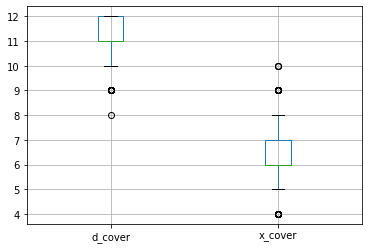

In [23]:
print(np.mean(df['d_cover']), np.mean(df['x_cover']))
df.boxplot(column=['d_cover', 'x_cover'])

In [24]:
dta = df[(df['sigma']==0)][['dta', 'trust', 'smoothness']].groupby(['trust', 'smoothness'])['dta'].sum().to_frame().unstack()
dta = dta['dta']
count = df[(df['sigma']==0)][['dta', 'trust', 'smoothness']].groupby(['trust', 'smoothness'])['dta'].count().to_frame().unstack()
count = count['dta']
dta = dta/count

([<matplotlib.axis.XTick at 0x11e420d90>,
 [Text(0, 0, 'none'),
  Text(1, 0, 'low'),
  Text(2, 0, 'moderate'),
  Text(3, 0, 'high')])

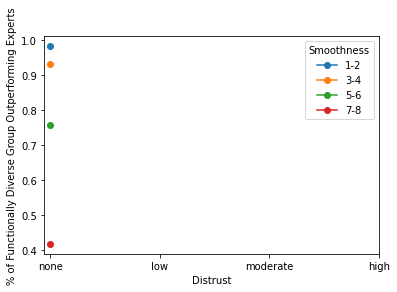

In [25]:
fig, ax = plt.subplots()
for i in range(1, 9, 2):
    data = list((dta[i]+dta[i+1])/2)
    data.reverse()
    ax.plot(data, label=str(i)+'-'+str(i+1), marker='o')
#     ax.set_ylim(0, 70)
plt.xlabel('Distrust')
plt.ylabel('% of Functionally Diverse Group Outperforming Experts')
plt.legend(title='Smoothness')
plt.xticks((0, 1, 2, 3), ['none', 'low', 'moderate', 'high'])

# plt.savefig('graphs/main.png', dpi=200, bbox_inches='tight')

In [26]:
df['dta'] = df['dta'].map(lambda x: int(x))

In [27]:
m = ols("dta ~ trust", data=df[(df['sigma']==0)]).fit()
m.summary()

/usr/local/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    dta   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 24 Apr 2023   Prob (F-statistic):                nan
Time:                        10:17:46   Log-Likelihood:                -263.49
No. Observations:                 480   AIC:                             529.0
Df Residuals:                     479   BIC:                             533.1
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7729      0.019     40.378      0.000       0.735       0.811
trust               0          0        nan        nan           0           0
==============================================================================
Omnibus:                       88.796   Durbin-Watson:                   1.674
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.628
Skew:                          -1.303   Prob(JB):                     1.30e-30
Kurtosis:                       2.697   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [28]:
df['diff'] = df['diverse'] - df['expert']

In [29]:
diff = df[(df['sigma']==0)][['diff', 'trust', 'smoothness']].groupby(['trust', 'smoothness'])['diff'].mean().to_frame().unstack()
diff = diff['diff']

([<matplotlib.axis.XTick at 0x11e49ec70>,
 [Text(0, 0, 'none'),
  Text(1, 0, 'low'),
  Text(2, 0, 'moderate'),
  Text(3, 0, 'high')])

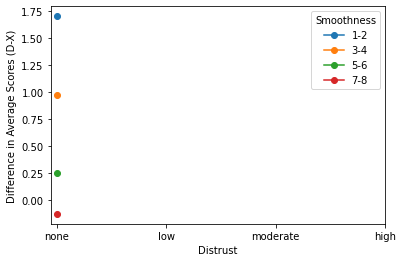

In [30]:
fig, ax = plt.subplots()
for i in range(1, 9, 2):
    data = list((diff[i]+diff[i+1])/2)
    data.reverse()
    ax.plot(data, label=str(i)+'-'+str(i+1), marker='o')
#     ax.set_ylim(0, 70)
plt.xlabel('Distrust')
plt.ylabel('Difference in Average Scores (D-X)')
plt.legend(title='Smoothness')
plt.xticks((0, 1, 2, 3), ['none', 'low', 'moderate', 'high'])

# plt.savefig('graphs/main.png', dpi=200, bbox_inches='tight')